In [65]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()


In [74]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create features and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


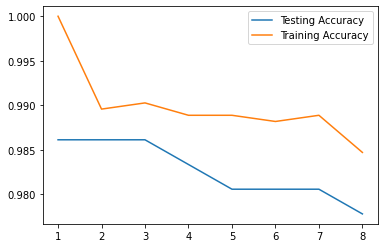

In [75]:
from sklearn.neighbors import KNeighborsClassifier
neighbours = []
train_scores = []
test_scores = []
for n in range(1,9):
    knn =KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    neighbours.append(n)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbours, test_scores, label = 'Testing Accuracy')
plt.plot(neighbours, train_scores, label='Training Accuracy')
plt.legend()

In the above graph, k = 2 is the best as the difference between the training and testing accuracy is the least. This shows that k = 2 has the least bais towards training data and will be useful for predictions.

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

kernels = ['linear', 'poly','rbf','sigmoid']
scores=[]
for kernel in kernels:
    svm = SVC(kernel = kernel, C=1.0,cache_size=200,class_weight=None,
              coef0=0.0,decision_function_shape='ovr', degree=3, max_iter=-1,probability=False,random_state=None,
              shrinking=True,tol=0.001,verbose=False)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    print(kernel)
    print(classification_report(y_test, y_pred))

linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      1.00      0.98        44
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        36
           4       1.00      0.91      0.96        35
           5       0.98      1.00      0.99        43
           6       1.00      0.94      0.97        35
           7       0.98      1.00      0.99        40
           8       0.89      0.92      0.90        36
           9       0.93      0.93      0.93        28

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

poly
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        31
           3

In [85]:
for i in range(4):
    print(kernels[i],':', scores[i])

linear : 0.9722222222222222
poly : 0.9805555555555555
rbf : 0.9805555555555555
sigmoid : 0.8777777777777778


I believe linear kernel should be used even though the accuracy of other kernels is better. The complexity of rbf increases with increase in data and poly tend to provide poor accuracy. Moreover, the data being used is linear, hence, linear kernel should be used.

0.8782185107863605 0.8472222222222222
Accuracy score: 0.8472222222222222


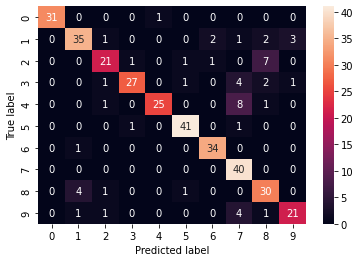

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
#Accuracy score
print(bayes.score(X_train,y_train), bayes.score(X_test,y_test))
print('Accuracy score:', accuracy_score(y_test, y_pred))

<BarContainer object of 3 artists>

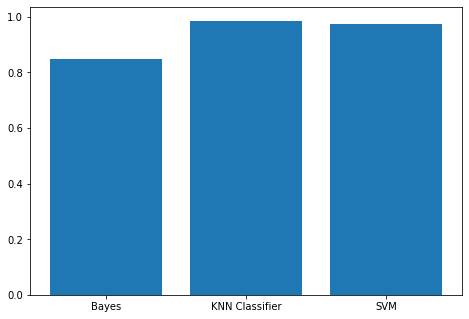

In [88]:
# Comparing Accuracy of three models
scores = []
labels=['Bayes','KNN Classifier', 'SVM']
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 3),
    SVC(kernel = 'linear')
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, scores)


In [87]:
import pandas as pd

df = pd.read_csv('gapminder.csv')
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


<AxesSubplot:>

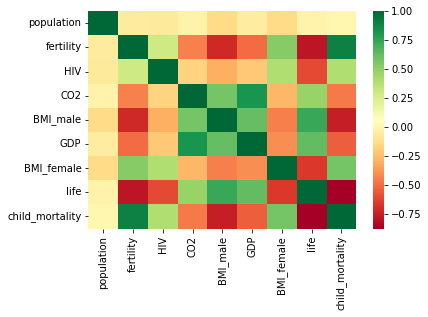

In [89]:
sns.heatmap(df.corr(),cmap='RdYlGn')

C:\Users\Slaye\AppData\Local\Temp/ipykernel_12680/1698759354.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\Slaye\AppData\Local\Temp/ipykernel_12680/1698759354.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x,y,'bo',x,regression.predict(x[:,None]),'-k')


Text(0, 0.5, 'Life Expectancy')

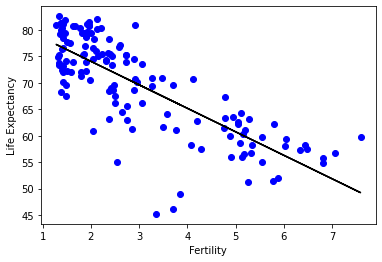

In [90]:
# Linear Regression with one feature
from sklearn.linear_model import LinearRegression

x = df['fertility']
y = df['life']

regression = LinearRegression()
regression.fit(x[:, None], y)

fig, ax = plt.plot(x,y,'bo',x,regression.predict(x[:,None]),'-k')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

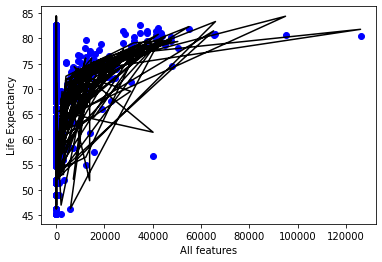

In [91]:
# Linear Regression with all features

X = df[["fertility","HIV","CO2","BMI_male","GDP","BMI_female","child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(X, y)
plt.xlabel('All features')
plt.ylabel('Life Expectancy')
plt.plot(X,y,'bo',X,regression_all.predict(X),'-k')

In [60]:
# Cross validation comparison
from sklearn.model_selection import cross_val_score
print('Fertility: ',cross_val_score(regression, x[:,None],y,cv=5))
print('All Features:',cross_val_score(regression_all, X,y,cv=5))

Fertility:  [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
All Features: [0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


C:\Users\Slaye\AppData\Local\Temp/ipykernel_12680/2598905702.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print('Fertility: ',cross_val_score(regression, x[:,None],y,cv=5))


From above comparison, it is clear that the accuracy obtained from using all features is more han the accuracy obtained from using one feature.

In [61]:
# load creditcard
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [62]:
# class and amount comparison
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), 'frauds', len(non_frauds), 'non frauds')

492 frauds 284315 non frauds


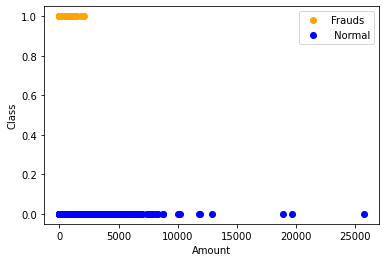

In [63]:
plt.plot(frauds.Amount,frauds.Class,'o',color='orange',label='Frauds')
plt.plot(non_frauds.Amount,non_frauds.Class,'bo',label=' Normal')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()

C:\Users\Slaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(33.0, 0.5, 'True label')

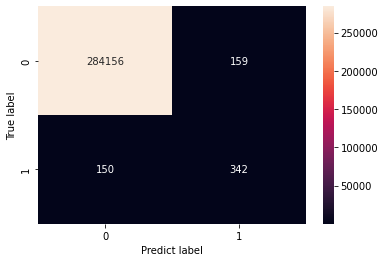

In [64]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
X = df.drop("Class",axis=1)
y=df.Class

log_regression = LogisticRegression()
log_regression.fit(X,y)

y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(conf_matrix, annot= True, fmt='g')
ax.set_xlabel("Predict label")
ax.set_ylabel('True label')